In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

In [29]:
df.shape

(349, 10)

In [30]:
df.sample(2)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
73,Rubella,Yes,No,Yes,No,35,Female,High,Normal,Negative
258,Coronary Artery Disease,No,No,Yes,No,55,Female,Normal,Normal,Positive


In [31]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [32]:
df.duplicated()

0      False
1      False
2      False
3      False
4       True
       ...  
344     True
345    False
346     True
347    False
348     True
Length: 349, dtype: bool

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.shape

(300, 10)

In [35]:
df.sample(3)


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
221,Sepsis,Yes,Yes,Yes,No,50,Male,Normal,Normal,Negative
192,Multiple Sclerosis,Yes,No,No,No,45,Female,High,High,Positive
212,Depression,No,Yes,Yes,No,50,Female,Low,Low,Negative


<Axes: xlabel='Disease'>

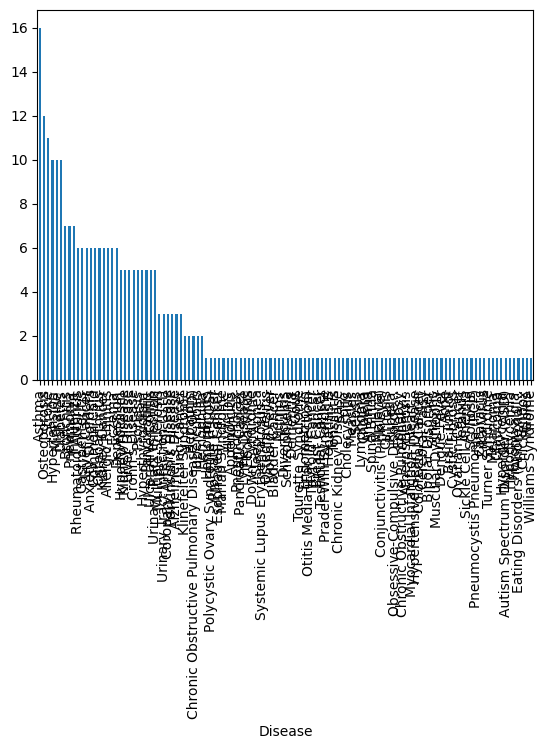

In [36]:
df['Disease'].value_counts().plot(kind='bar')

In [37]:
df['Disease'] = df['Disease'].apply(lambda x: x if df['Disease'].value_counts()[x]>4 else 'other')

In [38]:
# from pandas_profiling import ProfileReport
# pf = ProfileReport(df)
# pf.to_file(output_file='index.html')

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [40]:
lb = LabelEncoder()
df['Outcome Variable'] = lb.fit_transform(df[['Outcome Variable']])

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
trf1 = ColumnTransformer([
    ('disease', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ['Disease']),
    ('Fever', OrdinalEncoder(categories=[['No', 'Yes']]), ['Fever']),  # Example categories
    ('cough', OrdinalEncoder(categories=[['No', 'Yes']]), ['Cough']),
    ('fatigue', OrdinalEncoder(categories=[['No', 'Yes']]), ['Fatigue']),
    ('difficulty_breathing', OrdinalEncoder(categories=[['No', 'Yes']]), ['Difficulty Breathing']),
    ('Gender', OrdinalEncoder(categories=[['Female', 'Male']]), ['Gender']),
    ('blood_pressure', OrdinalEncoder(categories=[['Low', 'Normal', 'High']]), ['Blood Pressure']),
    ('cholesterol', OrdinalEncoder(categories=[['Low', 'Normal', 'High']]), ['Cholesterol Level'])
], remainder='passthrough')

In [42]:
# df = trf1.fit_transform(df)

In [43]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,1
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,0
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,0
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,1
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,1
...,...,...,...,...,...,...,...,...,...,...
341,other,Yes,Yes,Yes,No,70,Female,High,High,1
342,other,No,No,Yes,No,70,Female,Normal,Normal,1
343,Stroke,Yes,No,Yes,No,80,Female,High,High,1
345,Stroke,Yes,No,Yes,No,85,Male,High,High,1


In [44]:
x,y = df.drop(columns=['Outcome Variable']),df['Outcome Variable']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [46]:
x_test.sample()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
64,other,No,No,Yes,No,35,Male,High,High


In [47]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [48]:
pc = PCA(n_components=5)
x_train_pc = pc.fit_transform(trf1.fit_transform(x_train))
x_test_pc = pc.fit_transform(trf1.fit_transform(x_test))

In [49]:
trf2 = PCA(n_components=9)
trf3 = RandomForestClassifier()
pipe = make_pipeline(trf1,trf2,trf3)
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('disease',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Disease']),
                                                 ('Fever',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes']]),
                                                  ['Fever']),
                                                 ('cough',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes']]),
                                                  ['Cough']),
                                                 ('fatigue',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes']...
                                                  ['Difficulty Breathing']),
                                                 ('Gender',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male']]),
                                                  ['Gender']),
                                                 ('blood_pressure',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Normal',
                                                                              'High']]),
                                                  ['Blood Pressure']),
                                                 ('cholesterol',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Normal',
                                                                              'High']]),
                                                  ['Cholesterol Level'])])),
                ('pca', PCA(n_components=9)),
                ('randomforestclassifier', RandomForestClassifier())])

In [50]:
val = pipe.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test,val))
print(confusion_matrix(y_test,val))

0.8
[[11  3]
 [ 3 13]]


In [53]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
# from sklearn.decomposition import PCA
# pc = PCA(n_components=5)
# x_train_pc = pc.fit_transform(x)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
models = [DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),SVC(),XGBClassifier()]

In [ ]:
for model in models:
    print(model,end=": ")
    print(np.mean(cross_val_score(model,x_train_pc,y,cv=10,scoring='accuracy')))

DecisionTreeClassifier(): 

0.6633333333333333
RandomForestClassifier(): 0.7533333333333333
GradientBoostingClassifier(): 0.7166666666666666
SVC(): 0.55
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 0.7533333333333332


In [ ]:
from sklearn.model_selection import GridSearchCV

In [1]:
# param_xg = {
#     'learning_rate':[0.02,0.05,0.07,0.1,.3,.5],
#     'max_depth':[10,20,30,40],
#     'n_estimators':[10,20,30,40,50],
#     'booster':['dart',None],
#     'max_leaves':[None,0.1,0.05,0.15,.08,0.2,0.3],
#     'gamma':[None,0.01,0.05,0.1,0.2],
#     'base_estimators':[0.2,0.4,0.1,.6]

# }
# gd_xg = GridSearchCV(XGBClassifier(),n_jobs=-1,cv=5,param_grid=param_xg)
# gd_xg.fit(x_train_pc,y)
# gd_xg.best_score_

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth':[10,8,5,6,7,None],
    'learning_rate':[0.1,0.2,0.05,0.5],

    'n_estimators':[100,200,150,120,160],
    'loss':['log_loss', 'exponential'],
    'criterion':['friedman_mse','squared_error']
}


In [ ]:

gd = GridSearchCV(GradientBoostingClassifier(),param_grid=params,n_jobs=-1,cv=5)

In [2]:
# gd.fit(x_train_pc,y)

In [ ]:
gd.best_score_

0.72

In [ ]:
gd.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.5,
 'loss': 'log_loss',
 'max_depth': 6,
 'n_estimators': 160}

In [ ]:
trf = [('rf',RandomForestClassifier()),
       ('gd',GradientBoostingClassifier()),
       ('xg',XGBClassifier())
       ]

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vg = VotingClassifier(estimators=trf,voting='soft')

In [ ]:
vg.fit(x_train_pc,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('gd', GradientBoostingClassifier()),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [ ]:
accuracy_score(y_test,vg.predict(x_test_pc))

0.4666666666666667

In [ ]:
print(np.mean(cross_val_score(vg,x_train_pc,y,cv=5,n_jobs=-1,scoring='accuracy')))

0.7


In [ ]:
from sklearn.ensemble import StackingClassifier
st = StackingClassifier(estimators=trf,final_estimator=SVC())

In [ ]:
print(np.mean(cross_val_score(st,x_train_pc,y,n_jobs=-1,scoring='accuracy',cv=5)
              ))

0.6833333333333332
